<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-Mastery-with-Python/blob/main/8.%20Machine%20Learning%20Algorithm%20Performance%20Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithm Performance Metrics**

The metrics that you choose to evaluate your machine learning algorithms are very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influences how you weight the importance of different characteristics in the results and your ultimate choice of which algorithm to choose. In this chapter you will discover how to select and use different machine learning performance metrics in Python with scikit-learn.

**8.1 Algorithm Evaluation Metrics**

In this lesson, various algorithm evaluation metrics are demonstrated for both classification and regression type machine learning problems.

•	For classification metrics, the Pima Indians onset of diabetes dataset is used as demonstration. This is a binary classification problem where all of the input variables are numeric.

•	For regression metrics, the Boston House Price dataset is used as demonstration. this is a regression problem where all of the input variables are also numeric.

All recipes evaluate the same algorithms, Logistic Regression for classification and Linear Regression for the regression problems. A 10-fold cross-validation test harness is used to demonstrate each metric, because this is the most likely scenario you will use when employing different algorithm evaluation metrics.
A caveat in these recipes is the cross_validation.cross_val_score() function used to report the performance in each recipe. It does allow the use of different scoring metrics that will be discussed, but all scores are reported so that they can be sorted in ascending order (largest score is best). Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best) and as such are reported as negative by the cross_validation.cross_val_score() function. This is important to note, because some scores will be reported as negative that by definition can never be negative. I will remind you about this caveat as we work through the lesson.
Let's get on with the evaluation metrics.

**8.2 Classification Metrics**

Classification problems are perhaps the most common type of machine learning problem and as such there is a myriad of metrics that can be used to evaluate predictions for these problems. In this section we will review how to use the following metrics:

•	Classification Accuracy.

•	Logarithmic Loss.

•	Area Under ROC Curve.

•	Confusion Matrix.

•	Classification Report.

**8.2.1 Classification Accuracy**

Classification accuracy is the number of correct predictions made as a ratio of all predictions made. This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case. Below is an example of calculating classification accuracy.


In [ ]:
# Cross Validation Classification Accuracy
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

You can see that the ratio is reported. This can be converted into a percentage by multiplying the value by 100, giving an accuracy score of approximately 77% accurate.

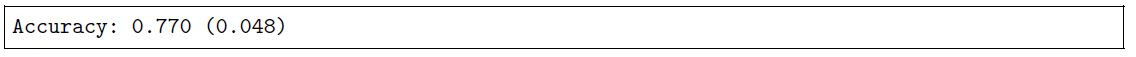

**8.2.2 Logarithmic Loss**

Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction. Below is an example of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes dataset.


In [ ]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())

Smaller logloss is better with 0 representing a perfect logloss. As mentioned above, the measure is inverted to be ascending when using the cross_val_score() function.

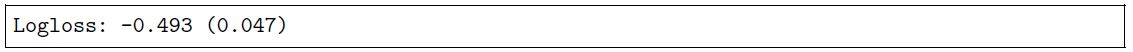

**8.2.3 Area Under ROC Curve**

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random. ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

•	Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.

•	Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

The example below provides a demonstration of calculating AUC.


In [ ]:
# Cross Validation Classification ROC AUC
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())

You can see the AUC is relatively close to 1 and greater than 0.5, suggesting some skill in the predictions

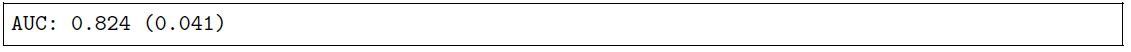

**8.2.4 Confusion Matrix**

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm. For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual = 1. And so on. Below is an example of calculating a confusion matrix for a set of predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.


In [ ]:
# Cross Validation Classification Confusion Matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

Although the array is printed without headings, you can see that the majority of the predictions fall on the diagonal line of the matrix (which are correct predictions).

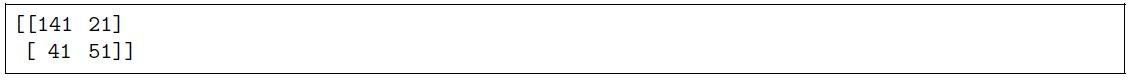

**8.2.5 Classification Report**

The scikit-learn library provides a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures. The classification_report() function displays the precision, recall, F1-score and support for each class. The example below demonstrates the report on the binary classification problem.


In [ ]:
# Cross Validation Classification Report
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

You can see good prediction and recall for the algorithm.

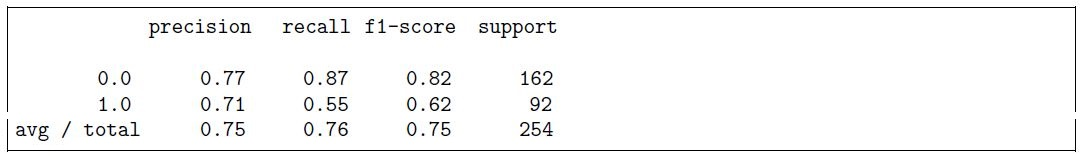

**8.3 Regression Metrics**

In this section will review 3 of the most common metrics for evaluating predictions on regression machine learning problems:

•	Mean Absolute Error.

•	Mean Squared Error.

•	R2.

**8.3.1 Mean Absolute Error**

The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). The example below demonstrates calculating mean absolute error on the Boston house price dataset.


In [ ]:
# Cross Validation Regression MAE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())

A value of 0 indicates no error or perfect predictions. Like logloss, this metric is inverted by the cross_val_score() function.

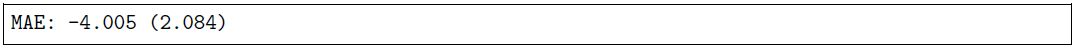

**8.3.2 Mean Squared Error**

The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. Taking the square root of the mean squared error converts the units back to the original units of the output variable and can be meaningful for description and presentation. This is called the Root Mean Squared Error (or RMSE). The example below provides a demonstration of calculating mean squared error.


In [ ]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

This metric too is inverted so that the results are increasing. Remember to take the absolute value before taking the square root if you are interested in calculating the RMSE.

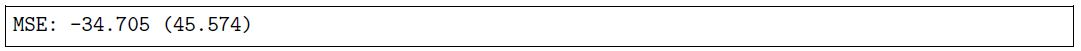

**8.3.3 R2 Metric**

The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature this measure is called the coefficient of determination. This is a value between 0 and 1 for no-fit and perfect fit respectively. The example below provides a demonstration of calculating the mean R2 for a set of predictions.


In [ ]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

You can see the predictions have a poor _t to the actual values with a value closer to zero and less than 0.5.

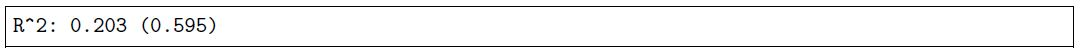